# EDA Telco customers churn PHONE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
df = pd.read_csv('df_train_phone.csv')

In [3]:
num_col = ['tenure', 'totalcharges', 'monthlycharges']
target = 'churn'
X_col = [c for c in df.columns if c != target]
cat_col = [c for c in X_col if c not in num_col]


<Axes: xlabel='churn', ylabel='Count'>

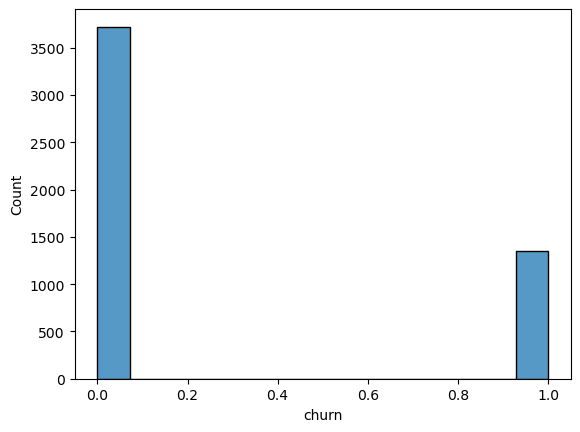

In [4]:
sns.histplot(data=df, x='churn')

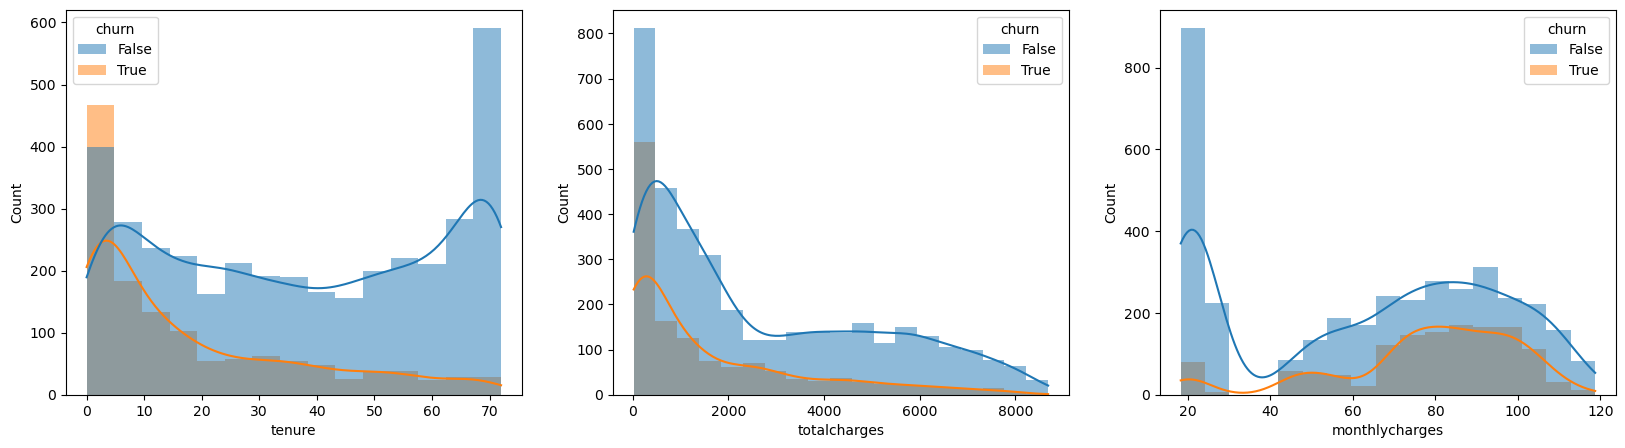

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for col, ax in zip(num_col, axes):
    sns.histplot(
        data=df, x=col, kde=True, ax=ax, hue=target, binwidth=df[col].std() /5, edgecolor=None
    )

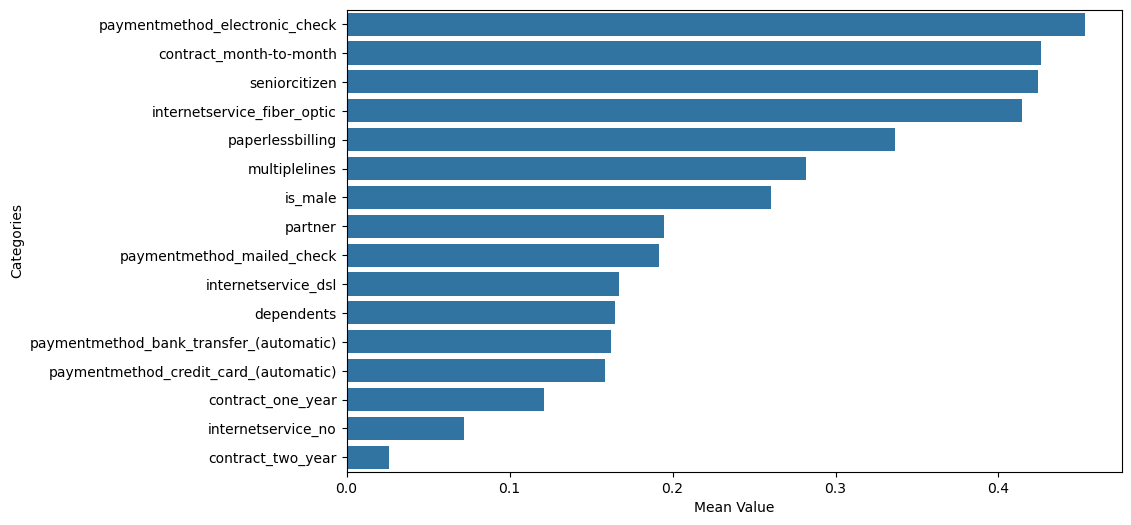

In [6]:
probability_of_churn_given_flag = df[df[target]][cat_col].sum() / df[cat_col].sum()
probability_of_churn_given_flag = probability_of_churn_given_flag.sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(data=probability_of_churn_given_flag, orient= 'h')
plt.xlabel('Mean Value')
plt.ylabel('Categories')
plt.show()

In [7]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.loc[:, num_col] = scaler.fit_transform(df_scaled[num_col])

In [8]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled[X_col])
importances = pca.explained_variance_ratio_ / np.sum(pca.explained_variance_ratio_)
print(pd.Series(importances)[:3])

0    0.394506
1    0.206265
2    0.048431
dtype: float64


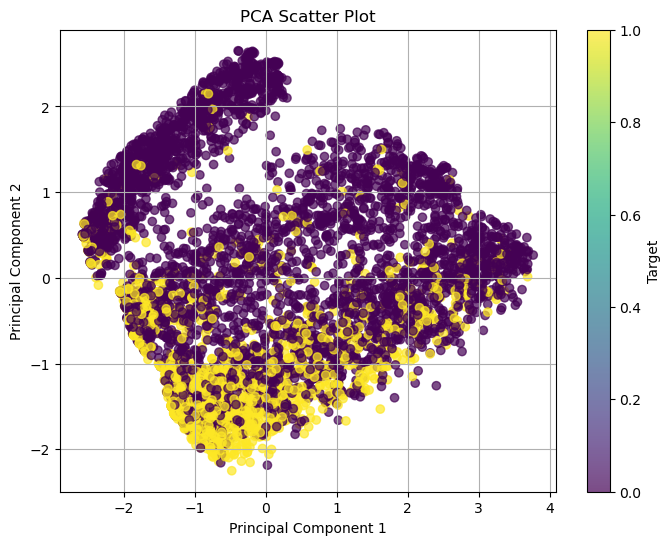

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df[target], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.colorbar(label="Target")
plt.grid()
plt.show()

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled[X_col])

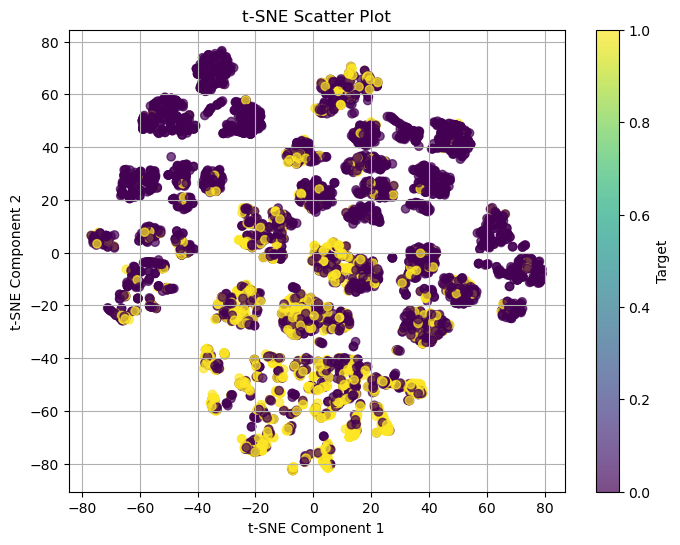

In [11]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df[target], cmap="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.colorbar(label="Target")
plt.grid()
plt.show()